In [1]:
# importing necessary modules
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation
import tensorflow
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.features import PCA as yPCA
import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.random_projection import GaussianRandomProjection
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.manifold import TSNE

In [2]:
import random
np.random.seed(21)

In [3]:
import tensorflow as tf 
tf.random.set_seed(2)

In [4]:
from sklearn.metrics import get_scorer
roc_auc_scorer = get_scorer('roc_auc')
precision_scorer = get_scorer('precision')
recall_scorer=get_scorer('recall')
f1_scorer=get_scorer('f1')
accuracy_scorer = get_scorer('accuracy')

In [5]:
# collecting the datasets - train and test, checking them (to final combine into 1 csv)

In [6]:
col_names =['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [7]:
file_train = pd.read_csv('adult.data',header=None, names =col_names)

In [8]:
file_train.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [9]:
file_train['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [10]:
24720/7841

3.152659099604642

In [11]:
#file_train['capital-gain'].value_counts()

In [12]:
#file_train['capital-loss'].value_counts()

In [13]:
file_train['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [14]:
file_train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
file_train[file_train['workclass']==' ?']['workclass'].count()

1836

In [16]:
file_train[file_train['education']==' ?']['workclass'].count()

0

In [17]:
file_train[file_train['marital_status']==' ?']['marital_status'].count()

0

In [18]:
file_train[file_train['occupation']==' ?']['occupation'].count()

1843

In [19]:
file_train[file_train['relationship']==' ?']['relationship'].count()

0

In [20]:
file_train[file_train['race']==' ?']['race'].count()

0

In [21]:
file_train[file_train['sex']==' ?']['sex'].count()

0

In [22]:
file_train[file_train['native-country']==' ?']['native-country'].count()

583

In [23]:
file_train[(file_train['workclass']==' ?')|(file_train['occupation']==' ?')|(file_train['native-country']==' ?')].count()

age               2399
workclass         2399
fnlwgt            2399
education         2399
education_num     2399
marital_status    2399
occupation        2399
relationship      2399
race              2399
sex               2399
capital-gain      2399
capital-loss      2399
hours-per-week    2399
native-country    2399
income            2399
dtype: int64

In [24]:
# dropping missing value in train file

In [25]:
file_train2 = file_train.drop(file_train[(file_train['workclass']==' ?')|(file_train['occupation']==' ?')|(file_train['native-country']==' ?')].index)

In [26]:
file_train2.shape

(30162, 15)

In [27]:
file_train2['income'].value_counts()

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

In [28]:
22654/7508

3.017314864144912

In [29]:
file_train.shape

(32561, 15)

In [30]:
file_test = pd.read_csv('adult.test',header=None,names =col_names)

In [31]:
file_test.head()

age   workclass  fnlwgt      education  education_num       marital_status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country   income  
0             0              40   United-States   <=50K.  
1             0              50   United-States   <=50K.  
2             0              40   United-States    >50K.  
3             0              40   United-States    >50K.  
4             0              30   United-States   <=50K.

In [32]:
file_test['income'].value_counts()

 <=50K.    12435
 >50K.      3846
Name: income, dtype: int64

In [33]:
12435/3846

3.233229329173167

In [34]:
file_test.shape

(16281, 15)

In [35]:
file_test[file_test['workclass']==' ?']['workclass'].count()

963

In [36]:
file_test[file_test['education']==' ?']['workclass'].count()

0

In [37]:
file_test[file_test['marital_status']==' ?']['marital_status'].count()

0

In [38]:
file_test[file_test['occupation']==' ?']['occupation'].count()

966

In [39]:
file_test[file_test['relationship']==' ?']['relationship'].count()

0

In [40]:
file_test[file_test['race']==' ?']['race'].count()

0

In [41]:
file_test[file_test['sex']==' ?']['sex'].count()

0

In [42]:
file_test[file_test['native-country']==' ?']['native-country'].count()

274

In [43]:
file_test[(file_test['workclass']==' ?')|(file_test['occupation']==' ?')|(file_test['native-country']==' ?')].count()

age               1221
workclass         1221
fnlwgt            1221
education         1221
education_num     1221
marital_status    1221
occupation        1221
relationship      1221
race              1221
sex               1221
capital-gain      1221
capital-loss      1221
hours-per-week    1221
native-country    1221
income            1221
dtype: int64

In [44]:
# dropping missing value in test file

In [45]:
file_test2 =file_test.drop(file_test[(file_test['workclass']==' ?')|(file_test['occupation']==' ?')|(file_test['native-country']==' ?')].index)

In [46]:
file_test2.shape

(15060, 15)

In [47]:
file_test2['income'].value_counts()

 <=50K.    11360
 >50K.      3700
Name: income, dtype: int64

In [48]:
11360/3700

3.0702702702702704

In [49]:
file_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [50]:
file_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [51]:
file_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [52]:
# combining provided train and test files into big file

In [53]:
big_file = file_train.append(file_test)

In [54]:
big_file.shape

(48842, 15)

In [55]:
big_file2 = big_file.copy()

In [56]:
# dropping missing values in big file

In [57]:
big_file2 = big_file2.drop(big_file2[(big_file2['workclass']==' ?')|(big_file2['occupation']==' ?')|(big_file2['native-country']==' ?')].index)

In [58]:
big_file2.shape

(42960, 15)

In [59]:
# processing features

In [60]:
big_file2['income'].value_counts()

 <=50K     21786
 <=50K.    10512
 >50K       7237
 >50K.      3425
Name: income, dtype: int64

In [61]:
big_file2['income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [62]:
big_file2.loc[:,'income'].replace({' <=50K.':' <=50K',' >50K.':' >50K'},inplace=True)

In [63]:
big_file2['income'].value_counts()

 <=50K    32298
 >50K     10662
Name: income, dtype: int64

In [64]:
big_file2['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [65]:
big_file2.loc[:,'income'].replace({' <=50K':'<=50K',' >50K':'>50K'}, inplace=True)

In [66]:
big_file2['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [67]:
big_file2['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Local-gov',
       ' Federal-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [68]:
big_file2['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced', ' Separated',
       ' Married-AF-spouse', ' Widowed', ' Married-spouse-absent'],
      dtype=object)

In [69]:
big_file2['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Transport-moving', ' Farming-fishing',
       ' Machine-op-inspct', ' Sales', ' Other-service', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [70]:
big_file2['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [71]:
big_file2['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [72]:
big_file2['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [73]:
big_file2['native-country'].nunique()

41

In [74]:
big_file2['native-country'].unique()

array([' United-States', ' India', ' Mexico', ' Honduras', ' Puerto-Rico',
       ' Cuba', ' England', ' Canada', ' Germany', ' Iran',
       ' Philippines', ' Poland', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Jamaica', ' Guatemala', ' Italy',
       ' South', ' Japan', ' Yugoslavia', ' China', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Columbia', ' Ireland',
       ' Hungary', ' Hong', ' Holand-Netherlands'], dtype=object)

In [75]:
big_file2['native-country'].value_counts()

 United-States                 39216
 Mexico                          869
 Philippines                     269
 Germany                         179
 Puerto-Rico                     163
 Canada                          158
 India                           140
 El-Salvador                     139
 Cuba                            128
 England                         112
 China                           110
 Jamaica                          99
 South                            95
 Italy                            92
 Dominican-Republic               91
 Japan                            86
 Vietnam                          81
 Guatemala                        80
 Columbia                         78
 Poland                           76
 Haiti                            65
 Portugal                         59
 Iran                             55
 Taiwan                           52
 Greece                           46
 Nicaragua                        45
 Peru                             45
 

In [76]:
big_file2['education'].value_counts()

 HS-grad         14042
 Some-college     9430
 Bachelors        7181
 Masters          2382
 Assoc-voc        1856
 11th             1544
 Assoc-acdm       1432
 10th             1166
 7th-8th           780
 Prof-school       732
 9th               638
 12th              554
 Doctorate         515
 5th-6th           427
 1st-4th           213
 Preschool          68
Name: education, dtype: int64

In [77]:
big_file2['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' Some-college',
       ' 7th-8th', ' Doctorate', ' Assoc-acdm', ' 9th', ' Assoc-voc',
       ' Prof-school', ' 5th-6th', ' 10th', ' Preschool', ' 12th',
       ' 1st-4th'], dtype=object)

In [78]:
big_file2['education'].nunique()

16

In [79]:
ed_map ={' Preschool':1,' 1st-4th':2,' 5th-6th':3,' 7th-8th':4,' 9th':5,' 10th':6,' 11th':7,' 12th':8,' HS-grad':9,' Prof-school':10,' Assoc-acdm':11,' Assoc-voc':12,' Some-college':13,' Bachelors':14, ' Masters':15,' Doctorate':16}

In [80]:
big_file2.loc[:,'education']=big_file2.loc[:,'education'].apply(lambda x: ed_map[x])

In [81]:
big_file2['education'].unique()

array([14,  9,  7, 15, 13,  4, 16, 11,  5, 12, 10,  3,  6,  1,  8,  2])

In [82]:
big_file3=pd.get_dummies(big_file2[['workclass','marital_status','occupation','relationship','race','sex']],drop_first=True)

In [83]:
big_file3.head(2)

workclass_ Local-gov  workclass_ Private  workclass_ Self-emp-inc  \
0                     0                   0                        0   
1                     0                   0                        0   

   workclass_ Self-emp-not-inc  workclass_ State-gov  workclass_ Without-pay  \
0                            0                     1                       0   
1                            1                     0                       0   

   marital_status_ Married-AF-spouse  marital_status_ Married-civ-spouse  \
0                                  0                                   0   
1                                  0                                   1   

   marital_status_ Married-spouse-absent  marital_status_ Never-married  \
0                                      0                              1   
1                                      0                              0   

   marital_status_ Separated  marital_status_ Widowed  \
0                          0                        0   
1                          0                        0   

   occupation_ Armed-Forces  occupation_ Craft-repair  \
0                         0                         0   
1                         0                         0   

   occupation_ Exec-managerial  occupation_ Farming-fishing  \
0                            0                            0   
1                            1                            0   

   occupation_ Handlers-cleaners  occupation_ Machine-op-inspct  \
0                              0                              0   
1                              0                              0   

   occupation_ Other-service  occupation_ Priv-house-serv  \
0                          0                            0   
1                          0                            0   

   occupation_ Prof-specialty  occupation_ Protective-serv  occupation_ Sales  \
0                           0                            0                  0   
1                           0                            0                  0   

   occupation_ Tech-support  occupation_ Transport-moving  \
0                         0                             0   
1                         0                             0   

   relationship_ Not-in-family  relationship_ Other-relative  \
0                            1                             0   
1                            0                             0   

   relationship_ Own-child  relationship_ Unmarried  relationship_ Wife  \
0                        0                        0                   0   
1                        0                        0                   0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  sex_ Male  
0                         0            0            0            1          1  
1                         0            0            0            1          1

In [84]:
big_file4= pd.concat([big_file3,big_file2[['education','age','fnlwgt','education_num','capital-gain','capital-loss','hours-per-week','income']]],axis=1)

In [85]:
big_file4.head(2)

workclass_ Local-gov  workclass_ Private  workclass_ Self-emp-inc  \
0                     0                   0                        0   
1                     0                   0                        0   

   workclass_ Self-emp-not-inc  workclass_ State-gov  workclass_ Without-pay  \
0                            0                     1                       0   
1                            1                     0                       0   

   marital_status_ Married-AF-spouse  marital_status_ Married-civ-spouse  \
0                                  0                                   0   
1                                  0                                   1   

   marital_status_ Married-spouse-absent  marital_status_ Never-married  \
0                                      0                              1   
1                                      0                              0   

   marital_status_ Separated  marital_status_ Widowed  \
0                          0                        0   
1                          0                        0   

   occupation_ Armed-Forces  occupation_ Craft-repair  \
0                         0                         0   
1                         0                         0   

   occupation_ Exec-managerial  occupation_ Farming-fishing  \
0                            0                            0   
1                            1                            0   

   occupation_ Handlers-cleaners  occupation_ Machine-op-inspct  \
0                              0                              0   
1                              0                              0   

   occupation_ Other-service  occupation_ Priv-house-serv  \
0                          0                            0   
1                          0                            0   

   occupation_ Prof-specialty  occupation_ Protective-serv  occupation_ Sales  \
0                           0                            0                  0   
1                           0                            0                  0   

   occupation_ Tech-support  occupation_ Transport-moving  \
0                         0                             0   
1                         0                             0   

   relationship_ Not-in-family  relationship_ Other-relative  \
0                            1                             0   
1                            0                             0   

   relationship_ Own-child  relationship_ Unmarried  relationship_ Wife  \
0                        0                        0                   0   
1                        0                        0                   0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  sex_ Male  \
0                         0            0            0            1          1   
1                         0            0            0            1          1   

   education  age  fnlwgt  education_num  capital-gain  capital-loss  \
0         14   39   77516             13          2174             0   
1         14   50   83311             13             0             0   

   hours-per-week income  
0              40  <=50K  
1              13  <=50K

In [86]:
big_file4.shape

(42960, 43)

In [87]:
big_file4['income'].value_counts()

<=50K    32298
>50K     10662
Name: income, dtype: int64

In [88]:
32298/10662

3.0292628024760835

In [89]:
big_file5 = big_file4.copy()

In [90]:
income_map={'<=50K':0,'>50K':1 }

In [91]:
big_file5['income']=big_file5['income'].apply(lambda x : income_map[x])

In [92]:
big_file5['income'].value_counts()

0    32298
1    10662
Name: income, dtype: int64

In [93]:
big_file5.iloc[:4,35:]

education  age  fnlwgt  education_num  capital-gain  capital-loss  \
0         14   39   77516             13          2174             0   
1         14   50   83311             13             0             0   
2          9   38  215646              9             0             0   
3          7   53  234721              7             0             0   

   hours-per-week  income  
0              40       0  
1              13       0  
2              40       0  
3              40       0

In [94]:
big_file5.head(2)

workclass_ Local-gov  workclass_ Private  workclass_ Self-emp-inc  \
0                     0                   0                        0   
1                     0                   0                        0   

   workclass_ Self-emp-not-inc  workclass_ State-gov  workclass_ Without-pay  \
0                            0                     1                       0   
1                            1                     0                       0   

   marital_status_ Married-AF-spouse  marital_status_ Married-civ-spouse  \
0                                  0                                   0   
1                                  0                                   1   

   marital_status_ Married-spouse-absent  marital_status_ Never-married  \
0                                      0                              1   
1                                      0                              0   

   marital_status_ Separated  marital_status_ Widowed  \
0                          0                        0   
1                          0                        0   

   occupation_ Armed-Forces  occupation_ Craft-repair  \
0                         0                         0   
1                         0                         0   

   occupation_ Exec-managerial  occupation_ Farming-fishing  \
0                            0                            0   
1                            1                            0   

   occupation_ Handlers-cleaners  occupation_ Machine-op-inspct  \
0                              0                              0   
1                              0                              0   

   occupation_ Other-service  occupation_ Priv-house-serv  \
0                          0                            0   
1                          0                            0   

   occupation_ Prof-specialty  occupation_ Protective-serv  occupation_ Sales  \
0                           0                            0                  0   
1                           0                            0                  0   

   occupation_ Tech-support  occupation_ Transport-moving  \
0                         0                             0   
1                         0                             0   

   relationship_ Not-in-family  relationship_ Other-relative  \
0                            1                             0   
1                            0                             0   

   relationship_ Own-child  relationship_ Unmarried  relationship_ Wife  \
0                        0                        0                   0   
1                        0                        0                   0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  sex_ Male  \
0                         0            0            0            1          1   
1                         0            0            0            1          1   

   education  age  fnlwgt  education_num  capital-gain  capital-loss  \
0         14   39   77516             13          2174             0   
1         14   50   83311             13             0             0   

   hours-per-week  income  
0              40       0  
1              13       0

In [95]:
big_file5.columns

Index(['workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'rac

In [425]:
big_file5.iloc[:2,35:]

education  age  fnlwgt  education_num  capital-gain  capital-loss  \
0         14   39   77516             13          2174             0   
1         14   50   83311             13             0             0   

   hours-per-week  income  
0              40       0  
1              13       0

In [426]:
big_file5.shape

(42960, 43)

In [96]:
#big_file5.to_csv('census_processed.csv')

In [97]:
# separating target and other features

In [98]:
y=big_file5['income'].values
X=big_file5.drop(['income'],axis=1).values

In [99]:
#X[:2]

In [100]:
len(y)

42960

In [101]:
X.shape

(42960, 42)

In [102]:
#splitting train and test sets

In [103]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=8,stratify=y,shuffle=True)

In [104]:
np.count_nonzero(y_test)

3199

In [105]:
np.count_nonzero(y_train)

7463

In [106]:
X_train.shape

(30072, 42)

In [107]:
X_test.shape

(12888, 42)

In [108]:
X_train_sel = X_train[:,35:]
X_test_sel = X_test[:,35:]

In [109]:
# standardization

In [110]:
scaler=StandardScaler()
scaler.fit(X_train_sel)

StandardScaler()

In [111]:
X_train_sel_std=scaler.transform(X_train_sel)
X_test_sel_std=scaler.transform(X_test_sel)

In [114]:
a=X_train[:,0:35]
b=X_test[:,0:35]
X_train_scale =np.concatenate([a,X_train_sel_std],axis=1)
X_test_scale =np.concatenate([b,X_test_sel_std],axis=1)

In [115]:
X_train_scale.shape

(30072, 42)

In [116]:
X_test_scale.shape

(12888, 42)

In [117]:
#Kmeans

In [ ]:
# checking number of clusters using different metrics

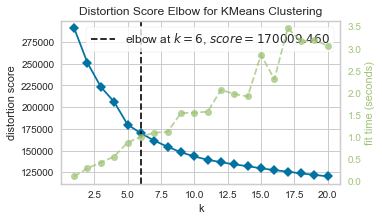

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
plt.figure(figsize=(5,3))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(X_train_scale)        
visualizer.show()        

In [119]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='calinski_harabasz', timings=True)
visualizer.fit(X_train_scale)        
visualizer.show()

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [295]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='silhouette', timings=True)
visualizer.fit(X_train_scale)        
visualizer.show() 

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [405]:
def fowlkes_mallows_scorer(clusters,X,y):
    lst=[]
    for i in range(2,clusters+1):
        model = KMeans (n_clusters =i)
        model.fit(X)
        label = model.predict(X)
        lst.append(metrics.fowlkes_mallows_score(y,label))
    return lst

In [413]:
fowlkes_mallows_score_kmeans = fowlkes_mallows_scorer(20,X_train_scale,y_train)

In [414]:
n_components = list(range(2,21))

Text(0, 0.5, 'Fowlkes-Mallows score')

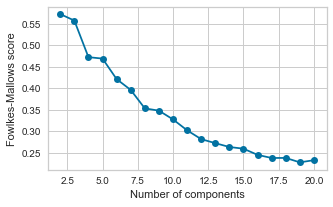

In [415]:
plt.figure(figsize=(5,3))
plt.plot(n_components,fowlkes_mallows_score_kmeans,'-o')
plt.xlabel('Number of components')
plt.ylabel('Fowlkes-Mallows score')

In [421]:
X_train_scale.shape

(30072, 42)

In [296]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [297]:
import matplotlib.cm as cm

In [123]:
model1=KMeans(n_clusters=2, random_state=1)
model1.fit(X_train_scale)
label_x_train1=model1.predict(X_train_scale)

In [124]:
metrics.homogeneity_score(y_train,label_x_train1)

0.052882160381064705

In [125]:
metrics.completeness_score(y_train,label_x_train1)

0.04306533253160107

In [126]:
metrics.fowlkes_mallows_score(y_train,label_x_train1)

0.572004989257774

In [127]:
metrics.v_measure_score(y_train,label_x_train1)

0.04747154412618069

In [128]:
metrics.adjusted_rand_score(y_train,label_x_train1)

0.02106790103733856

In [129]:
metrics.adjusted_mutual_info_score(y_train,label_x_train1)

0.0474461683359472

In [145]:
label_x_train1= label_x_train1.reshape(30072,1)

In [333]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(X_train_scale)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 297.73455595970154 seconds


In [334]:
df_kmeans2 = np.concatenate((tsne_results, label_x_train1), axis=1)
df_kmeans2  = pd.DataFrame(df_kmeans2 , columns = ['tsne1', 'tsne2', 'Outcome'])

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

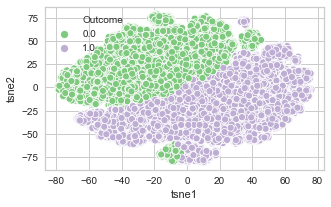

In [335]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="Outcome",
    palette='Accent',
    data=df_kmeans2 
)

In [437]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(X_train_scale)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 323.5198862552643 seconds


In [438]:
y_train_reshape = y_train.reshape(30072,1)

In [439]:
df_kmeans2 = np.concatenate((tsne_results, y_train_reshape), axis=1)
df_kmeans2  = pd.DataFrame(df_kmeans2 , columns = ['tsne1', 'tsne2', 'Outcome'])

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

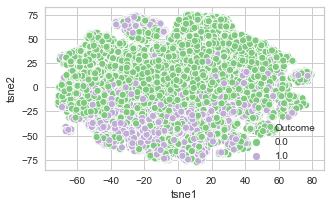

In [440]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="Outcome",
    palette='Accent',
    data=df_kmeans2 
)

In [ ]:
# combining kmeans clusters with original data

In [470]:
new_kmeans2= np.concatenate((X_train_scale, label_x_train1), axis=1)

In [471]:
df_kmeans2 = pd.DataFrame(new_kmeans2, columns = ['workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Male', 'education', 'age', 'fnlwgt',
       'education_num', 'capital-gain', 'capital-loss', 'hours-per-week','income_kmeans'])

In [472]:
import warnings
warnings.simplefilter("ignore", UserWarning)

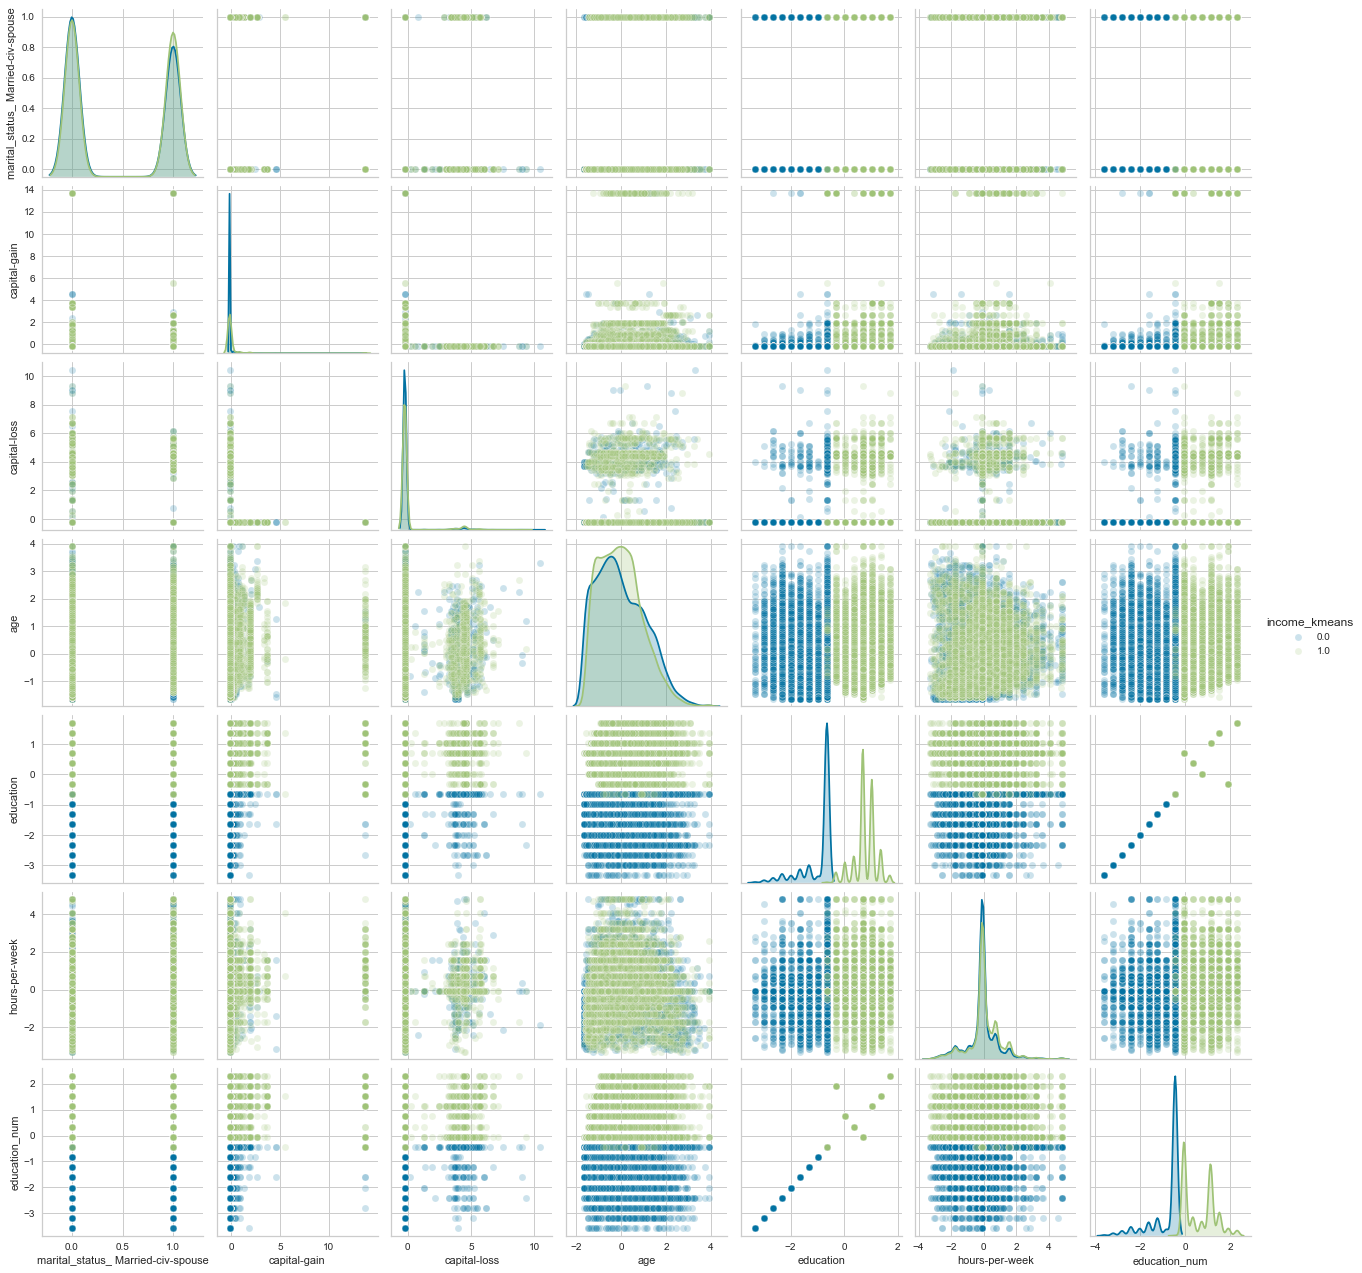

In [473]:
sns.pairplot(df_kmeans2, vars= ['marital_status_ Married-civ-spouse','capital-gain','capital-loss','age','education','hours-per-week','education_num'], hue='income_kmeans', plot_kws={'alpha':0.2})

In [ ]:
#original dataset

In [431]:
y_train.shape

(30072,)

In [474]:
y_train_reshape = y_train.reshape(30072,1)

In [475]:
orig_df= np.concatenate((X_train_scale, y_train_reshape), axis=1)

In [476]:
df_orig = pd.DataFrame(orig_df, columns = ['workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Male', 'education', 'age', 'fnlwgt',
       'education_num', 'capital-gain', 'capital-loss', 'hours-per-week','income'])

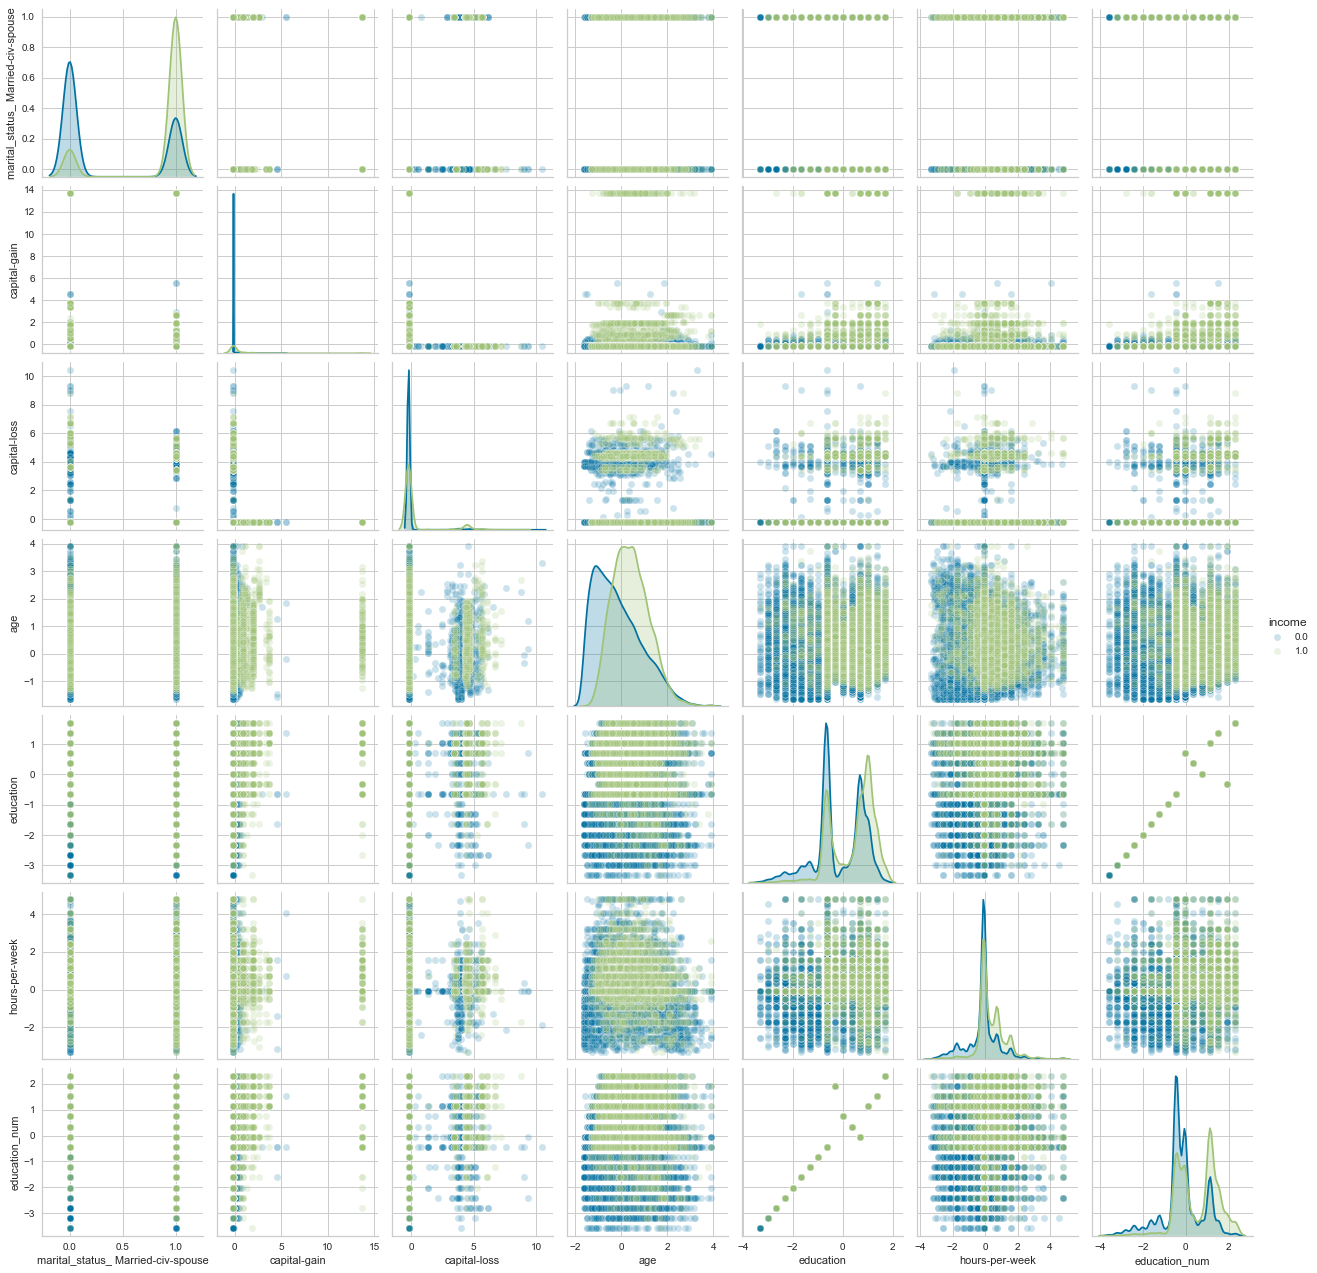

In [477]:
sns.pairplot(df_orig, vars= ['marital_status_ Married-civ-spouse','capital-gain','capital-loss','age','education','hours-per-week', 'education_num'], hue='income', plot_kws={'alpha':0.2})

In [ ]:
# EM algorithm

In [154]:
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture

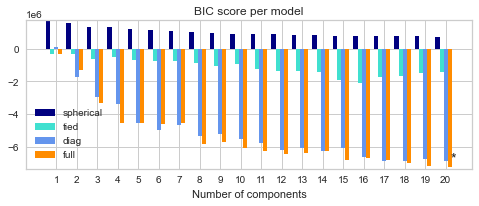

In [166]:
# code from scikit library https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html
lowest_bic = np.infty
bic = []
n_components_range = range(1,21)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_train_scale)
        bic.append(gmm.bic(X_train_scale))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

#print(best_gmm.covariance_type, best_gmm.covariances_)

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [443]:
gmm1=mixture.GaussianMixture(n_components=10, covariance_type='full')
label_gmm1 = gmm1.fit_predict(X_train_scale)

In [339]:
metrics.homogeneity_score(y_train,label_gmm1)

0.12691329973728366

In [340]:
metrics.completeness_score(y_train,label_gmm1)

0.039116644432607504

In [341]:
metrics.fowlkes_mallows_score(y_train,label_gmm1)

0.35983439253666244

In [342]:
metrics.v_measure_score(y_train,label_gmm1)

0.05980153091556049

In [343]:
metrics.adjusted_rand_score(y_train,label_gmm1)

0.0018463623242043336

In [344]:
metrics.adjusted_mutual_info_score(y_train,label_gmm1)

0.05968306997840032

In [346]:
gmm2=mixture.GaussianMixture(n_components=20, covariance_type='full')
label_gmm2 = gmm2.fit_predict(X_train_scale)

In [347]:
metrics.homogeneity_score(y_train,label_gmm2)

0.22600158209831572

In [348]:
metrics.completeness_score(y_train,label_gmm2)

0.05139896896866777

In [349]:
metrics.fowlkes_mallows_score(y_train,label_gmm2)

0.2745692139904656

In [350]:
metrics.v_measure_score(y_train,label_gmm2)

0.08375072263166625

In [351]:
metrics.adjusted_rand_score(y_train,label_gmm2)

0.004711119899484439

In [352]:
metrics.adjusted_mutual_info_score(y_train,label_gmm2)

0.0835588931782582

In [371]:
label_gmm2 = label_gmm2.reshape(30072,1)

In [372]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(X_train_scale)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 293.14676308631897 seconds


In [373]:
df_gmm2 = np.concatenate((tsne_results, label_gmm2), axis=1)
df_gmm2  = pd.DataFrame(df_gmm2 , columns = ['tsne1', 'tsne2', 'Outcome'])

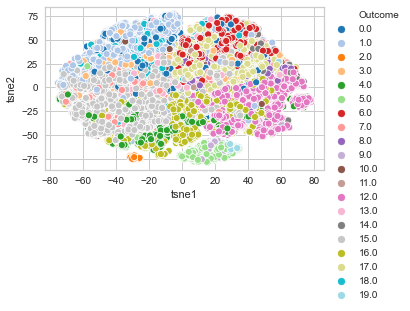

In [378]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="Outcome",
    palette='tab20',
    data=df_gmm2
)

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.fig.legend(h,l, ncol=2)

In [444]:
label_gmm1 = label_gmm1.reshape(30072,1)

In [363]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(X_train_scale)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 301.4993751049042 seconds


In [366]:
df_gmm1 = np.concatenate((tsne_results, label_gmm1), axis=1)
df_gmm1  = pd.DataFrame(df_gmm1 , columns = ['tsne1', 'tsne2', 'Outcome'])

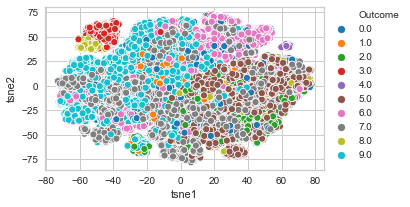

In [370]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="Outcome",
    palette='tab10',
    data=df_gmm1
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [465]:
label_gmm1 = label_gmm1.reshape(30072,1)

In [ ]:
#PCA 

(0.0, 42.0)

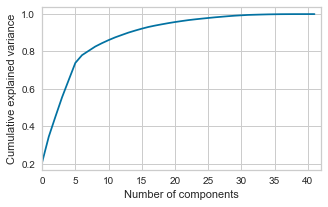

In [155]:
pca=PCA().fit(X_train_scale)
plt.figure(figsize=(5,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.xlim(0,42,1)

In [156]:
X_train_scale.shape

(30072, 42)

Text(0, 0.5, 'variance')

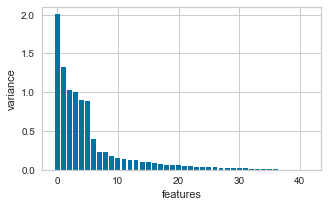

In [157]:
pca=PCA().fit(X_train_scale)
plt.figure(figsize=(5,3))
features=range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('features')
plt.ylabel('variance')

In [164]:
pca=PCA(n_components=12)
X_pca=pca.fit_transform(X_train_scale)
X_pca.shape

(30072, 12)

In [165]:
y_train.shape

(30072,)

In [166]:
reshape_y_train = y_train.reshape(30072,1)

In [167]:
df_pca1= np.concatenate((X_pca, reshape_y_train), axis=1)
df_pca1 = pd.DataFrame(df_pca1, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5',
       'pc6','pc7','pc8','pc9','pc10','pc11', 'pc12',  'Outcome'])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

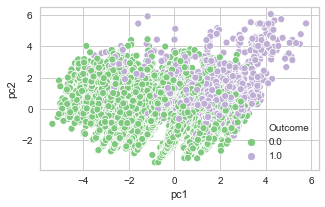

In [168]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="pc1", y="pc2",
    hue="Outcome",
    palette='Accent',
    data=df_pca1
)

In [163]:
plt.figure(figsize=(5,3))
visualizer = yPCA(scale=True, proj_features=True, projection=2)
visualizer.fit_transform(X_train_scale, y_train)
visualizer.show()

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [169]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_pca_results = tsne.fit_transform(X_pca)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 282.15381598472595 seconds


In [170]:
df_pca1= np.concatenate((tsne_pca_results, reshape_y_train), axis=1)
df_pca1 = pd.DataFrame(df_pca1, columns = ['tsne_pc1', 'tsne_pc2', 'Outcome'])

In [171]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_pc1", y="tsne_pc2",
    hue="Outcome",
    palette='Accent',
    data=df_pca1
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# running kmeans on PCA

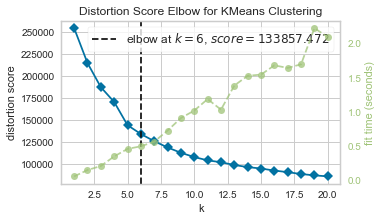

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [172]:
plt.figure(figsize=(5,3))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(X_pca)        
visualizer.show()  

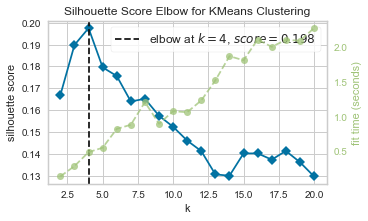

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [174]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='silhouette', timings=True)
visualizer.fit(X_pca)        
visualizer.show() 

In [173]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='calinski_harabasz', timings=True)
visualizer.fit(X_pca)        
visualizer.show()

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

Text(0.5, 1.0, 'Davies Bouldin score vs. K')

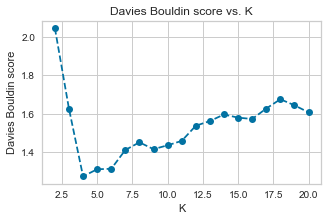

In [176]:
def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center).fit(data)
    labels = kmeans.labels_
    #print(labels)
    score = davies_bouldin_score(data, labels)
    return score

centers = list(range(2,21))
scores= []
for center in centers:
    scores.append(get_kmeans_score(X_pca, center))

plt.figure(figsize=(5,3))    
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. K')

In [177]:
model_pca_clu1=KMeans(n_clusters=4)
model_pca_clu1.fit(X_pca)
label_x_train_pca_clu1=model_pca_clu1.predict(X_pca)

In [180]:
label_x_train_pca_clu1.shape

(30072,)

In [178]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_pca_results = tsne.fit_transform(X_pca)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 270.24173283576965 seconds


In [181]:
label_x_train_pca_clu1 = label_x_train_pca_clu1.reshape(30072,1)

In [182]:
df_clu1_pca1 = np.concatenate((tsne_pca_results, label_x_train_pca_clu1), axis=1)
df_clu1_pca1 = pd.DataFrame(df_clu1_pca1, columns = ['tsne_pc1', 'tsne_pc2', 'Outcome'])

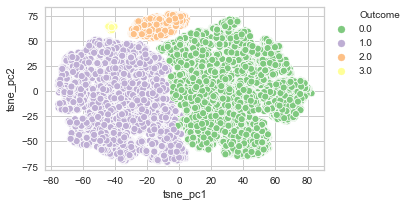

In [183]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_pc1", y="tsne_pc2",
    hue="Outcome",
    palette='Accent',
    data=df_clu1_pca1
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# running EM on PCA

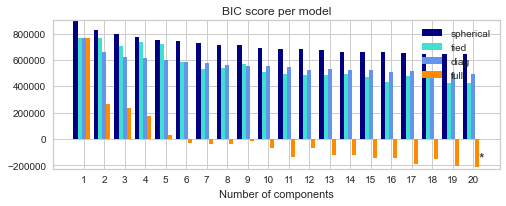

In [184]:
# code from scikit library https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

lowest_bic = np.infty
bic = []
n_components_range = range(1,21)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_pca)
        bic.append(gmm.bic(X_pca))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

#print(best_gmm.covariance_type, best_gmm.covariances_)

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)


In [185]:
gmm_clus_pca1=mixture.GaussianMixture(n_components=20 , covariance_type='full')
gmm_clus_pca1 = gmm_clus_pca1.fit_predict(X_pca)

In [186]:
metrics.homogeneity_score(y_train,gmm_clus_pca1)

0.29983025710929484

In [187]:
metrics.completeness_score(y_train,gmm_clus_pca1)

0.061317575596298

In [188]:
metrics.fowlkes_mallows_score(y_train,gmm_clus_pca1)

0.25246389379455686

In [189]:
metrics.v_measure_score(y_train,gmm_clus_pca1)

0.10181351120743935

In [190]:
metrics.adjusted_rand_score(y_train,gmm_clus_pca1)

0.02573738142958636

In [191]:
metrics.adjusted_mutual_info_score(y_train,gmm_clus_pca1)

0.10164130682410424

In [193]:
gmm_clus_pca1.shape

(30072,)

In [192]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_pca_results = tsne.fit_transform(X_pca)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 273.7269959449768 seconds


In [194]:
gmm_clus_pca1 = gmm_clus_pca1.reshape(30072,1)

In [195]:
df_gmm_pca1= np.concatenate((tsne_pca_results, gmm_clus_pca1), axis=1)
df_gmm_pca1 = pd.DataFrame(df_gmm_pca1, columns = ['tsne_pc1', 'tsne_pc2', 'Outcome'])

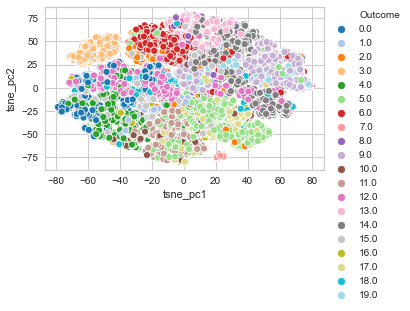

In [197]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_pc1", y="tsne_pc2",
    hue="Outcome",
    palette='tab20',
    data=df_gmm_pca1
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# ICA

In [204]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

In [205]:
def kurtosis_calc(components):
    lst=[]
    kurt = []
    for i in range(1,components+1):
        #print(i)
        ica= FastICA(n_components=i, random_state=1,max_iter=40000,tol=0.1)
        X_transformed = ica.fit_transform(X_train_scale)
        lst.append(np.mean(np.abs(np.apply_along_axis(kurtosis, 0, X_transformed))))
        kurt.append(np.apply_along_axis(kurtosis, 0, X_transformed))
    return lst, kurt

In [206]:
mean_kurtosis, kurt=kurtosis_calc(42)

In [207]:
n_components=list(range(1,43))

Text(0, 0.5, 'Mean kurtosis')

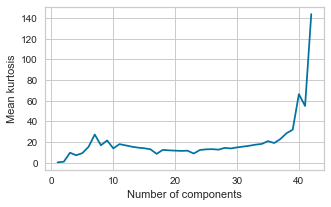

In [209]:
plt.figure(figsize=(5,3))
plt.plot(n_components,mean_kurtosis)
plt.xlabel('Number of components')
plt.ylabel('Mean kurtosis')

In [210]:
ica2= FastICA(n_components=42, random_state=1)
X_transformed_ica = ica2.fit_transform(X_train_scale)

In [214]:
X_transformed_ica.shape

(30072, 42)

In [211]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_ica_results = tsne.fit_transform(X_transformed_ica)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 315.67354011535645 seconds


In [215]:
df_ica2= np.concatenate((tsne_ica_results, reshape_y_train), axis=1)
df_ica2 = pd.DataFrame(df_ica2, columns = ['tsne_ica1', 'tsne_ica2', 'Outcome'])

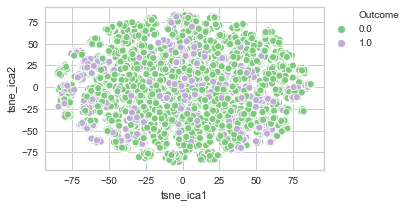

In [216]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_ica1", y="tsne_ica2",
    hue="Outcome",
    palette='Accent',
    data=df_ica2
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# running kmeans on ICA

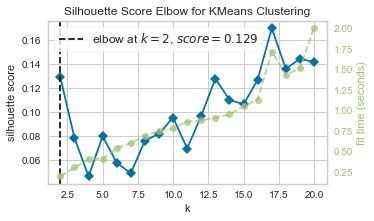

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [218]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='silhouette', timings=True)
visualizer.fit(X_transformed_ica)        
visualizer.show() 

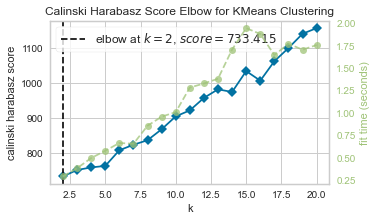

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [219]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='calinski_harabasz', timings=True)
visualizer.fit(X_transformed_ica)        
visualizer.show() 

In [220]:
centers = list(range(2,21))
scores= []
for center in centers:
    scores.append(get_kmeans_score(X_transformed_ica, center))

plt.figure(figsize=(5,3))    
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. K')

Text(0.5, 1.0, 'Davies Bouldin score vs. K')

In [221]:
model_ica_c3=KMeans(n_clusters=2)
model_ica_c3.fit(X_transformed_ica)
label_x_train_ica3=model_ica_c3.predict(X_transformed_ica)

In [222]:
metrics.homogeneity_score(y_train,label_x_train_ica3)

0.00025463390366827003

In [223]:
metrics.completeness_score(y_train,label_x_train_ica3)

0.0035402196787205522

In [224]:
metrics.fowlkes_mallows_score(y_train,label_x_train_ica3)

0.7857028871375934

In [225]:
metrics.v_measure_score(y_train,label_x_train_ica3)

0.000475096041027429

In [226]:
metrics.adjusted_rand_score(y_train,label_x_train_ica3)

-0.0030008167657377123

In [227]:
metrics.adjusted_mutual_info_score(y_train,label_x_train_ica3)

0.00041955177178109503

In [228]:
label_x_train_ica3.shape

(30072,)

In [231]:
label_x_train_ica3= label_x_train_ica3.reshape(30072,1)

In [230]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_ica_results = tsne.fit_transform(X_transformed_ica)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 300.22489190101624 seconds


In [232]:
df_ica3= np.concatenate((tsne_ica_results, label_x_train_ica3), axis=1)
df_ica3 = pd.DataFrame(df_ica3, columns = ['tsne_ica1', 'tsne_ica2', 'Outcome'])

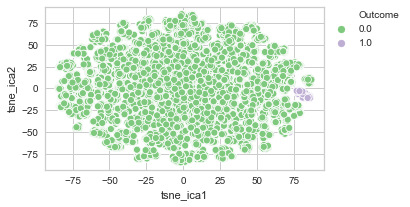

In [233]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_ica1", y="tsne_ica2",
    hue="Outcome",
    palette='Accent',
    data=df_ica3 
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [234]:
model_ica_c4=KMeans(n_clusters=17)
model_ica_c4.fit(X_transformed_ica)
label_x_train_ica4=model_ica_c4.predict(X_transformed_ica)

In [236]:
metrics.homogeneity_score(y_train,label_x_train_ica4)

0.12238928464097558

In [237]:
metrics.completeness_score(y_train,label_x_train_ica4)

0.028071579494451496

In [238]:
metrics.fowlkes_mallows_score(y_train,label_x_train_ica4)

0.27053300003777814

In [239]:
metrics.v_measure_score(y_train,label_x_train_ica4)

0.045668493967651574

In [240]:
metrics.adjusted_rand_score(y_train,label_x_train_ica4)

0.014933671511122426

In [241]:
metrics.adjusted_mutual_info_score(y_train,label_x_train_ica4)

0.045497703041312336

In [242]:
label_x_train_ica4= label_x_train_ica4.reshape(30072,1)

In [243]:
df_ica4= np.concatenate((tsne_ica_results, label_x_train_ica4), axis=1)
df_ica4 = pd.DataFrame(df_ica4, columns = ['tsne_ica1', 'tsne_ica2', 'Outcome'])

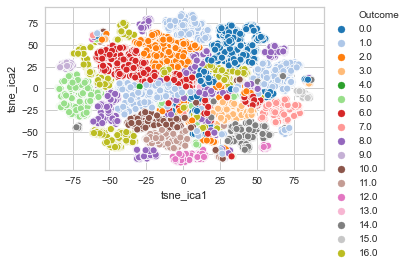

In [245]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_ica1", y="tsne_ica2",
    hue="Outcome",
    palette='tab20',
    data=df_ica4 
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# running EM on ICA data

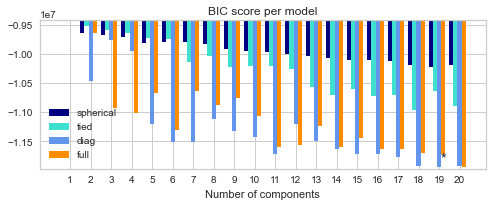

In [246]:
# code from scikit library https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

lowest_bic = np.infty
bic = []
n_components_range = range(1,21)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_transformed_ica)
        bic.append(gmm.bic(X_transformed_ica))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

#print(best_gmm.covariance_type, best_gmm.covariances_)

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)



In [247]:
gmm_ica=mixture.GaussianMixture(n_components=19, covariance_type='diag')
label_gmm_ica = gmm_ica.fit_predict(X_transformed_ica)

In [248]:
metrics.homogeneity_score(y_train,label_gmm_ica)

0.11502965010289937

In [249]:
metrics.completeness_score(y_train,label_gmm_ica)

0.02465075158773085

In [250]:
metrics.fowlkes_mallows_score(y_train,label_gmm_ica)

0.2350516509741676

In [251]:
metrics.v_measure_score(y_train,label_gmm_ica)

0.04060079002622714

In [252]:
metrics.adjusted_rand_score(y_train,label_gmm_ica)

0.004927895567629835

In [253]:
metrics.adjusted_mutual_info_score(y_train,label_gmm_ica)

0.04041765108735735

In [256]:
label_gmm_ica = label_gmm_ica.reshape(30072,1)

In [255]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_ica_gmm_results = tsne.fit_transform(X_transformed_ica)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 308.9994840621948 seconds


In [258]:
df_ica2= np.concatenate((tsne_ica_gmm_results, label_gmm_ica), axis=1)
df_ica2 = pd.DataFrame(df_ica2, columns = ['tsne_ica1', 'tsne_ica2', 'Outcome'])

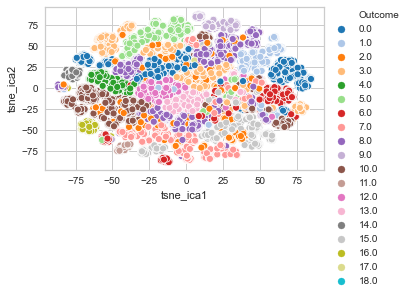

In [259]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_ica1", y="tsne_ica2",
    hue="Outcome",
    palette='tab20',
    data=df_ica2 
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
#ran the following reconstruction_error_calc with multiple random states -- please change the random state 5 times folowed by running the function, each time followed by running mean_sq_error2 until mean_sq_error

In [277]:
def reconstruction_error_calc(components):
    lst=[]
    for i in range(1,components+1):
        rp = GaussianRandomProjection(n_components=i, eps=0.1, random_state=1)
        X_rp = rp.fit_transform(X_train_scale)
        inverse_data = np.linalg.pinv((rp).components_.T)
        reconstructed_data = X_rp.dot(inverse_data)
        error = np.mean((reconstructed_data - X_train_scale)**2)
        lst.append(error)
    return lst

In [266]:
mean_sq_error2=reconstruction_error_calc(42)

In [269]:
mean_sq_error3=reconstruction_error_calc(42)

In [272]:
mean_sq_error4=reconstruction_error_calc(42)

In [275]:
mean_sq_error5=reconstruction_error_calc(42)

In [278]:
mean_sq_error=reconstruction_error_calc(42)

In [280]:
n_components=list(range(1,43))

Text(0, 0.5, 'Mean Squared error')

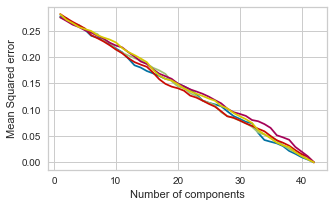

In [281]:
plt.figure(figsize=(5,3))
plt.plot(n_components,mean_sq_error)
plt.plot(n_components,mean_sq_error2)
plt.plot(n_components,mean_sq_error3)
plt.plot(n_components,mean_sq_error4)
plt.plot(n_components,mean_sq_error5)
plt.xlabel('Number of components')
plt.ylabel('Mean Squared error')

In [282]:
err=[(a+b+c+d+e)/2 for a,b,c,d,e in zip(mean_sq_error,mean_sq_error2,mean_sq_error3,mean_sq_error4,mean_sq_error5)]

Text(0, 0.5, 'Mean Squared error')

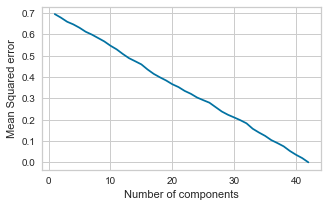

In [284]:
plt.figure(figsize=(5,3))
plt.plot(n_components,err)
plt.xlabel('Number of components')
plt.ylabel('Mean Squared error')

In [285]:
rp = GaussianRandomProjection(n_components=42, eps=0.1, random_state=200)
X_transformed_rp2 = rp.fit_transform(X_train_scale)

In [286]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_rp_results = tsne.fit_transform(X_transformed_rp2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 353.972856760025 seconds


In [287]:
df_rp1 = np.concatenate((tsne_rp_results, reshape_y_train), axis=1)
df_rp1 = pd.DataFrame(df_rp1, columns = ['tsne_rp1', 'tsne_rp2', 'Outcome'])

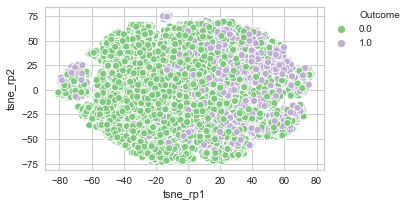

In [288]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_rp1", y="tsne_rp2",
    hue="Outcome",
    palette='Accent',
    data=df_rp1
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# running Kmeans on RP data

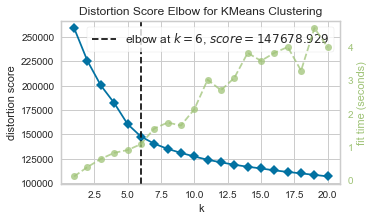

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [289]:
plt.figure(figsize=(5,3))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(X_transformed_rp2)        
visualizer.show()  

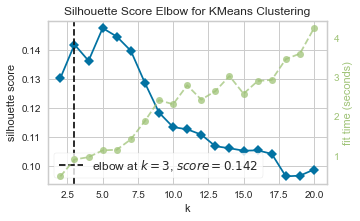

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [290]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='silhouette', timings=True)
visualizer.fit(X_transformed_rp2)        
visualizer.show() 

In [291]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='calinski_harabasz', timings=True)
visualizer.fit(X_transformed_rp2)        
visualizer.show() 

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [292]:
centers = list(range(2,21))
scores= []
for center in centers:
    scores.append(get_kmeans_score(X_transformed_rp2, center))

plt.figure(figsize=(5,3))    
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. K')

Text(0.5, 1.0, 'Davies Bouldin score vs. K')

In [293]:
model_rp_kmeans = KMeans(n_clusters=2)
model_rp_kmeans.fit(X_transformed_rp2)
label_x_rp2 = model_rp_kmeans.predict(X_transformed_rp2)

In [294]:
metrics.homogeneity_score(y_train,label_x_rp2)

0.04226473696399774

In [295]:
metrics.completeness_score(y_train,label_x_rp2)

0.03421209819988913

In [296]:
metrics.fowlkes_mallows_score(y_train,label_x_rp2)

0.5720401309215255

In [297]:
metrics.v_measure_score(y_train,label_x_rp2)

0.03781446573478433

In [298]:
metrics.adjusted_rand_score(y_train,label_x_rp2)

0.02621065963204874

In [299]:
metrics.adjusted_mutual_info_score(y_train,label_x_rp2)

0.037788917807118634

In [300]:
label_x_rp2.shape

(30072,)

In [303]:
label_x_rp2 = label_x_rp2.reshape(30072,1)

In [302]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_rp_results = tsne.fit_transform(X_transformed_rp2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 388.69493079185486 seconds


In [304]:
df_rp2= np.concatenate((tsne_rp_results, label_x_rp2), axis=1)
df_rp2 = pd.DataFrame(df_rp2, columns = ['tsne_rp1', 'tsne_rp2', 'Outcome'])

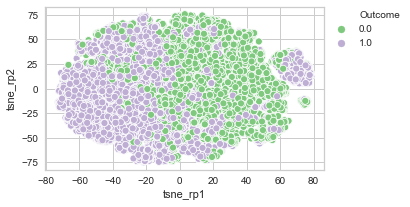

In [305]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_rp1", y="tsne_rp2",
    hue="Outcome",
    palette='Accent',
    data=df_rp2)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# running EM on RP

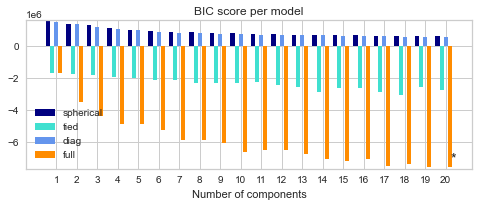

In [321]:
# code from scikit library https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

lowest_bic = np.infty
bic = []
n_components_range = range(1,21)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_transformed_rp2)
        bic.append(gmm.bic(X_transformed_rp2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

#print(best_gmm.covariance_type, best_gmm.covariances_)

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)


In [323]:
gmm_rp=mixture.GaussianMixture(n_components=20, covariance_type='full')
label_gmm_rp = gmm_rp.fit_predict(X_transformed_rp2)

In [324]:
metrics.homogeneity_score(y_train,label_gmm_rp)

0.1849398773288699

In [325]:
metrics.completeness_score(y_train,label_gmm_rp)

0.04210162114401832

In [326]:
metrics.fowlkes_mallows_score(y_train,label_gmm_rp)

0.2976244893570716

In [327]:
metrics.v_measure_score(y_train,label_gmm_rp)

0.06858894697306701

In [328]:
metrics.adjusted_rand_score(y_train,label_gmm_rp)

0.030552611535875383

In [329]:
metrics.adjusted_mutual_info_score(y_train,label_gmm_rp)

0.06839371913952434

In [331]:
label_gmm_rp = label_gmm_rp.reshape(30072,1)

In [332]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_rp_gmm_results = tsne.fit_transform(X_transformed_rp2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 296.8043978214264 seconds


In [333]:
df_rp2= np.concatenate((tsne_rp_gmm_results, label_gmm_rp), axis=1)
df_rp2 = pd.DataFrame(df_rp2, columns = ['tsne_rp1', 'tsne_rp2', 'Outcome'])

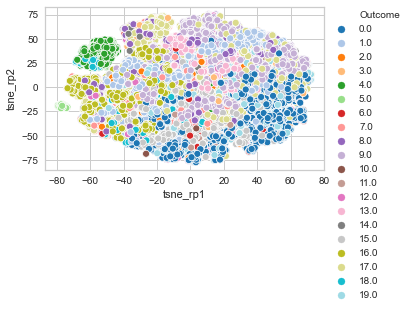

In [334]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_rp1", y="tsne_rp2",
    hue="Outcome",
    palette='tab20',
    data=df_rp2
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
#4th algo - feature selection followed b decision trees

In [351]:
dt3 =  DecisionTreeClassifier(random_state=21,ccp_alpha=0.0005)
dt3.fit(X_train_scale, y_train)

DecisionTreeClassifier(ccp_alpha=0.0005, random_state=21)

In [352]:
importances = dt3.feature_importances_
indices = np.argsort(importances)

In [353]:
cols=['workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Male', 'education', 'age', 'fnlwgt',
       'education_num', 'capital-gain', 'capital-loss', 'hours-per-week']

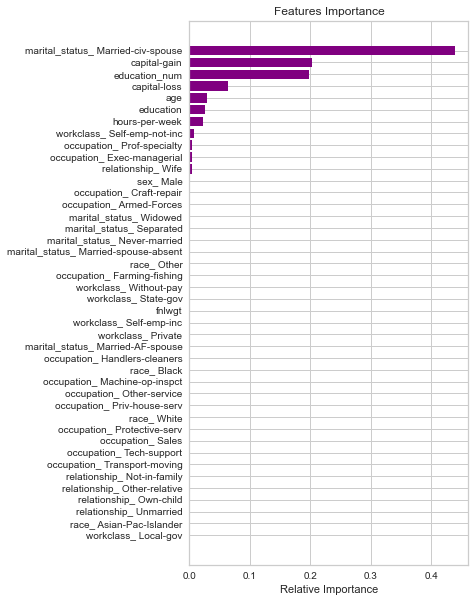

In [355]:
plt.figure(figsize=(5,10))
features = cols
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [356]:
feat= ['Married-civ-spouse','capital-gain','education_num','capital-loss','age','education','hours-per-week',
      'workclass_Self-emp-not-inc','occupation_Prof-specialty','occupation_Exec-managerial','relationship_Wife']

In [357]:
val=[0.4391485939763352,0.20267291775683044,0.19680645088473342,0.06295862804664126,0.02916142718750617,0.02644572381520054,0.022732851774143928,
     0.008318016527983802,0.004415369112627804,0.0038633689988884024,0.0034766519191089243
]

In [358]:
for i,v in enumerate(importances):
    
    print(features[i] ,v)

workclass_ Local-gov 0.0
workclass_ Private 0.0
workclass_ Self-emp-inc 0.0
workclass_ Self-emp-not-inc 0.008318016527983802
workclass_ State-gov 0.0
workclass_ Without-pay 0.0
marital_status_ Married-AF-spouse 0.0
marital_status_ Married-civ-spouse 0.4391485939763352
marital_status_ Married-spouse-absent 0.0
marital_status_ Never-married 0.0
marital_status_ Separated 0.0
marital_status_ Widowed 0.0
occupation_ Armed-Forces 0.0
occupation_ Craft-repair 0.0
occupation_ Exec-managerial 0.0038633689988884024
occupation_ Farming-fishing 0.0
occupation_ Handlers-cleaners 0.0
occupation_ Machine-op-inspct 0.0
occupation_ Other-service 0.0
occupation_ Priv-house-serv 0.0
occupation_ Prof-specialty 0.004415369112627804
occupation_ Protective-serv 0.0
occupation_ Sales 0.0
occupation_ Tech-support 0.0
occupation_ Transport-moving 0.0
relationship_ Not-in-family 0.0
relationship_ Other-relative 0.0
relationship_ Own-child 0.0
relationship_ Unmarried 0.0
relationship_ Wife 0.0034766519191089243
r

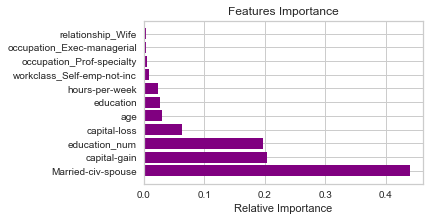

In [359]:
plt.figure(figsize=(5,3))
plt.title('Features Importance')
plt.barh(range(len(feat)), val, color='purple', align='center')
plt.yticks(range(len(feat)), feat)
plt.xlabel('Relative Importance')
plt.show()

In [361]:
X_train_scale.shape

(30072, 42)

In [362]:
y_train.shape

(30072,)

In [363]:
y_train_reshape = y_train.reshape(30072,1)

In [364]:
new_data= np.concatenate((X_train_scale, y_train_reshape), axis=1)

In [366]:
data_new = pd.DataFrame(new_data, columns = ['workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Male', 'education', 'age', 'fnlwgt',
       'education_num', 'capital-gain', 'capital-loss', 'hours-per-week',
       'income'])

In [367]:
data_new.head(2)

workclass_ Local-gov  workclass_ Private  workclass_ Self-emp-inc  \
0                   0.0                 1.0                      0.0   
1                   0.0                 0.0                      1.0   

   workclass_ Self-emp-not-inc  workclass_ State-gov  workclass_ Without-pay  \
0                          0.0                   0.0                     0.0   
1                          0.0                   0.0                     0.0   

   marital_status_ Married-AF-spouse  marital_status_ Married-civ-spouse  \
0                                0.0                                 0.0   
1                                0.0                                 1.0   

   marital_status_ Married-spouse-absent  marital_status_ Never-married  \
0                                    0.0                            1.0   
1                                    0.0                            0.0   

   marital_status_ Separated  marital_status_ Widowed  \
0                        0.0                      0.0   
1                        0.0                      0.0   

   occupation_ Armed-Forces  occupation_ Craft-repair  \
0                       0.0                       0.0   
1                       0.0                       0.0   

   occupation_ Exec-managerial  occupation_ Farming-fishing  \
0                          0.0                          0.0   
1                          1.0                          0.0   

   occupation_ Handlers-cleaners  occupation_ Machine-op-inspct  \
0                            0.0                            0.0   
1                            0.0                            0.0   

   occupation_ Other-service  occupation_ Priv-house-serv  \
0                        0.0                          0.0   
1                        0.0                          0.0   

   occupation_ Prof-specialty  occupation_ Protective-serv  occupation_ Sales  \
0                         0.0                          0.0                1.0   
1                         0.0                          0.0                0.0   

   occupation_ Tech-support  occupation_ Transport-moving  \
0                       0.0                           0.0   
1                       0.0                           0.0   

   relationship_ Not-in-family  relationship_ Other-relative  \
0                          1.0                           0.0   
1                          0.0                           0.0   

   relationship_ Own-child  relationship_ Unmarried  relationship_ Wife  \
0                      0.0                      0.0                 0.0   
1                      0.0                      0.0                 0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  sex_ Male  \
0                       0.0          0.0          0.0          1.0        1.0   
1                       0.0          0.0          0.0          1.0        1.0   

   education       age    fnlwgt  education_num  capital-gain  capital-loss  \
0   0.694076 -0.342017  0.850147      -0.046864     -0.145469     -0.220346   
1   0.694076  1.400005  0.642562      -0.046864     -0.145469     -0.220346   

   hours-per-week  income  
0        1.986246     0.0  
1       -0.080040     1.0

In [479]:
data_new_dt=data_new[['marital_status_ Married-civ-spouse','capital-gain','education_num','capital-loss','age','education','hours-per-week','income']]

In [481]:
data_X_dt2=data_new[['marital_status_ Married-civ-spouse','capital-gain','education_num','capital-loss','age','education','hours-per-week']].values

In [483]:
data_y_dt2=data_new[['income']].values

In [484]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000,random_state=1)
tsne_dt_results = tsne.fit_transform(data_X_dt2)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 238.97478103637695 seconds


In [485]:
df_dt1 = np.concatenate((tsne_dt_results,data_y_dt2), axis=1)
df_dt1 = pd.DataFrame(df_dt1, columns = ['tsne_dt1', 'tsne_dt2', 'Outcome'])

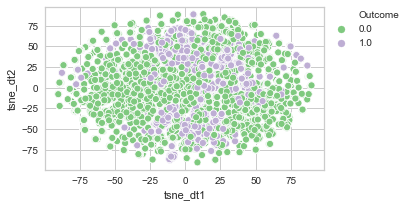

In [487]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_dt1", y="tsne_dt2",
    hue="Outcome",
    palette='Accent',
    data=df_dt1
)

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# Running Kmeans on decision trees

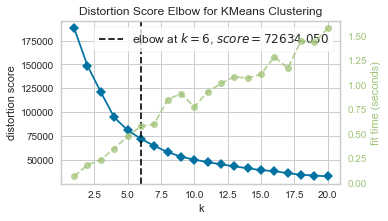

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [488]:
plt.figure(figsize=(5,3))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(data_X_dt2)        
visualizer.show()  

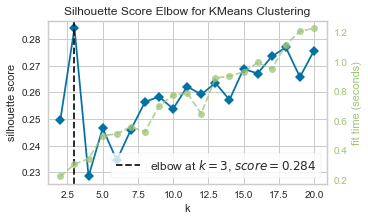

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [489]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='silhouette', timings=True)
visualizer.fit(data_X_dt2)        
visualizer.show() 

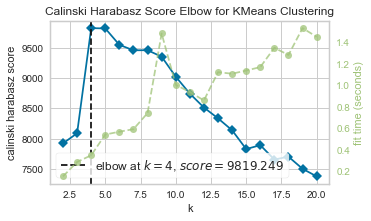

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [490]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='calinski_harabasz', timings=True)
visualizer.fit(data_X_dt2)        
visualizer.show() 

Text(0.5, 1.0, 'Davies Bouldin score vs. K')

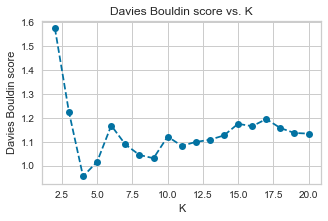

In [491]:
centers = list(range(2,21))
scores= []
for center in centers:
    scores.append(get_kmeans_score(data_X_dt2, center))

plt.figure(figsize=(5,3))    
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. K')

In [509]:
model3=KMeans(n_clusters=3)
model3.fit(data_X_dt2)
label_dt3=model3.predict(data_X_dt2)

In [510]:
metrics.homogeneity_score(y_train,label_dt3)

0.0637572801958447

In [511]:
metrics.completeness_score(y_train,label_dt3)

0.04219933445897241

In [512]:
metrics.fowlkes_mallows_score(y_train,label_dt3)

0.556945677659684

In [513]:
metrics.v_measure_score(y_train,label_dt3)

0.050785216193325204

In [514]:
label_dt3= label_dt3.reshape(30072,1)

In [515]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_dt_results = tsne.fit_transform(data_X_dt2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 239.11329317092896 seconds


In [516]:
df_dt2= np.concatenate((tsne_dt_results, label_dt3), axis=1)
df_dt2 = pd.DataFrame(df_dt2, columns = ['tsne_dt1', 'tsne_dt2', 'Outcome'])

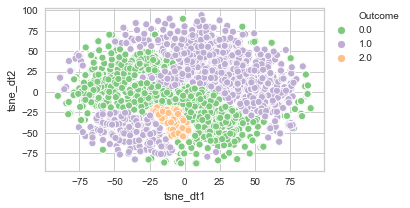

In [517]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_dt1", y="tsne_dt2",
    hue="Outcome",
    palette='Accent',
    data=df_dt2
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# running EM on decision trees data

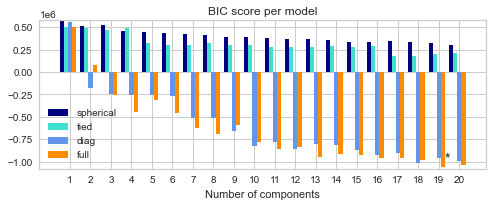

In [518]:
# code from scikit library https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

lowest_bic = np.infty
bic = []
n_components_range = range(1,21)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(data_X_dt2)
        bic.append(gmm.bic(data_X_dt2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

#print(best_gmm.covariance_type, best_gmm.covariances_)

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)


In [519]:
gmm_dt=mixture.GaussianMixture(n_components=19, covariance_type='full')
label_gmm_dt = gmm_dt.fit_predict(data_X_dt2)

In [520]:
metrics.homogeneity_score(y_train,label_gmm_dt)

0.27197630667484946

In [521]:
metrics.completeness_score(y_train,label_gmm_dt)

0.06479538202894353

In [522]:
metrics.fowlkes_mallows_score(y_train,label_gmm_dt)

0.33741304273291856

In [523]:
metrics.v_measure_score(y_train,label_gmm_dt)

0.10465730514133618

In [524]:
metrics.adjusted_rand_score(y_train,label_gmm_dt)

0.05601452992128519

In [525]:
metrics.adjusted_mutual_info_score(y_train,label_gmm_dt)

0.10447145304227436

In [526]:
label_gmm_dt= label_gmm_dt.reshape(30072,1)

In [527]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_dt_results = tsne.fit_transform(data_X_dt2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 233.3354160785675 seconds


In [528]:
df_dt2= np.concatenate((tsne_dt_results, label_gmm_dt), axis=1)
df_dt2 = pd.DataFrame(df_dt2, columns = ['tsne_dt1', 'tsne_dt2', 'Outcome'])

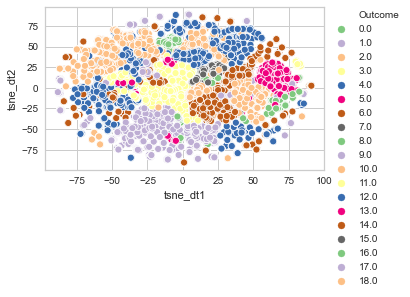

In [529]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_dt1", y="tsne_dt2",
    hue="Outcome",
    palette='Accent',
    data=df_dt2
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)